# Assignment Question 1 Draft

To address the given task, we'll go through it step by step, writing R code for each part. The task involves analyzing BMI data for Dutch boys aged 10 to 11 years from the `dbbmi` dataset in the `gamlss.data` package, fitting parametric distributions, and selecting an appropriate one based on the analysis.

### 1. Plotting the Data

First, let's load the data, subset it for the specific age group, and plot the histogram to find a suitable value for `nbins`.


Call:
	density.default(x = bmi10, cut = 0)

Data: bmi10 (340 obs.);	Bandwidth 'bw' = 0.4608

       x               y            
 Min.   :13.47   Min.   :3.280e-06  
 1st Qu.:17.22   1st Qu.:6.781e-03  
 Median :20.97   Median :1.938e-02  
 Mean   :20.97   Mean   :6.557e-02  
 3rd Qu.:24.72   3rd Qu.:1.169e-01  
 Max.   :28.48   Max.   :2.309e-01  

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


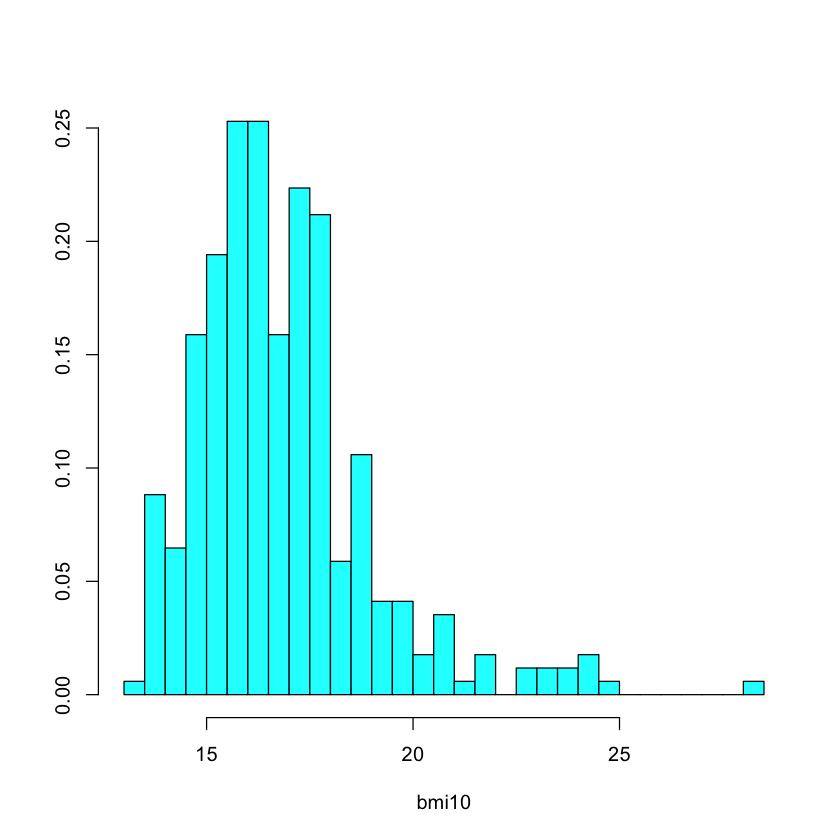

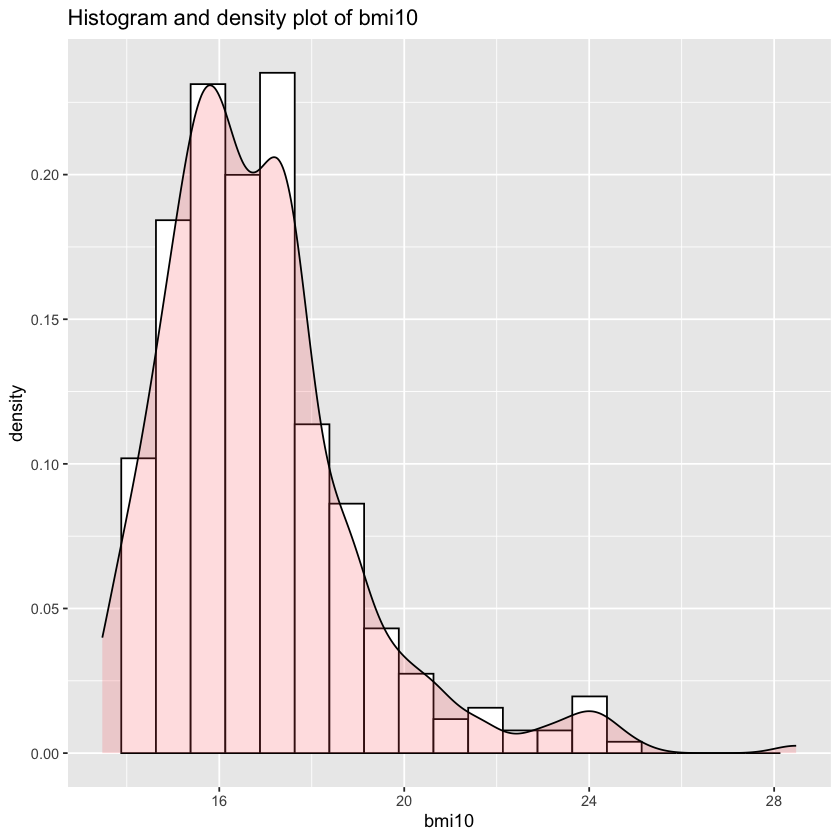

In [136]:
library(gamlss.data)
library(MASS)
library(gamlss)
library(ggplot2)

# Load the dataset
data(dbbmi)

# Subset for ages 10 to 11
old <- 10
da <- with(dbbmi, subset(dbbmi, age > old & age < old + 1))
bmi10 <- da$bmi

# Plot the histogram
truehist(bmi10, nbins=40) # Adjust nbins as needed to make the histogram look good
density(bmi10, cut = 0)
gamlss.ggplots:::y_hist(bmi10)

Experiment with the `nbins` parameter to find a visually appealing and informative histogram. The goal is to have enough bins to clearly see the distribution's shape without making it too noisy.

### 2. Fitting Parametric Distributions

Next, we'll fit several parametric distributions to the data. Common distributions for BMI data include the Normal, Log-Normal, and Gamma distributions, among others. The `gamlss` package provides functions to fit a wide range of distributions.

  |=============================================                         |  65%

Warning message in MLE(ll2, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma), :
“possible convergence problem: optim gave code=1 false convergence (8)”


  |======================================================                |  76%

Warning message in MLE(ll2, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma), :
“possible convergence problem: optim gave code=1 false convergence (8)”


  |=======================================================               |  78%

Warning message in MLE(ll2, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma), :
“possible convergence problem: optim gave code=1 false convergence (8)”


  |========================================================              |  80%

Warning message in MLE(ll2, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma), :
“possible convergence problem: optim gave code=1 false convergence (8)”


  |==============================================================        |  88%

Warning message in nlminb(start = start, objective = f, control = optim.control):
“NA/NaN function evaluation”


  |=================================================================     |  92%Error in solve.default(oout$hessian) : 
  Lapack routine dgesv: system is exactly singular: U[4,4] = 0
  |==================================================================    |  94%Error in solve.default(oout$hessian) : 
  Lapack routine dgesv: system is exactly singular: U[4,4] = 0
  |======================================================================| 100%

Warning message in nlminb(start = start, objective = f, control = optim.control):
“NA/NaN function evaluation”


BCCG    BCCGo       GG       RG   exGAUS    BCPEo 
1390.450 1390.450 1390.509 1391.149 1392.442 1392.448

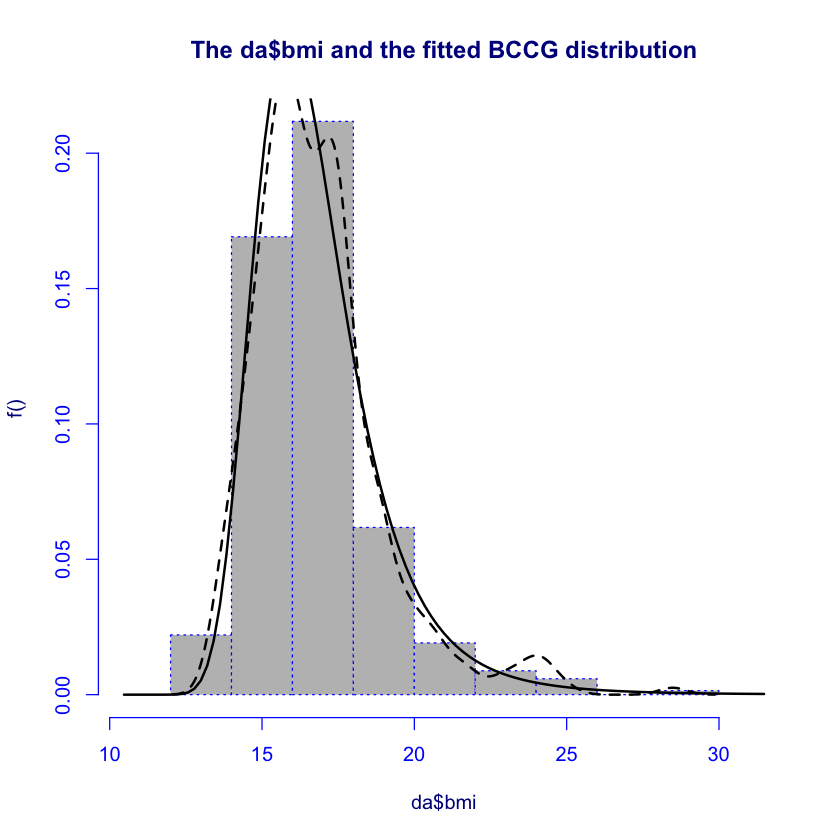

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  -8.025677e-05 
                       variance   =  1.002349 
               coef. of skewness  =  0.00378816 
               coef. of kurtosis  =  2.886385 
Filliben correlation coefficient  =  0.9975348 
******************************************************************


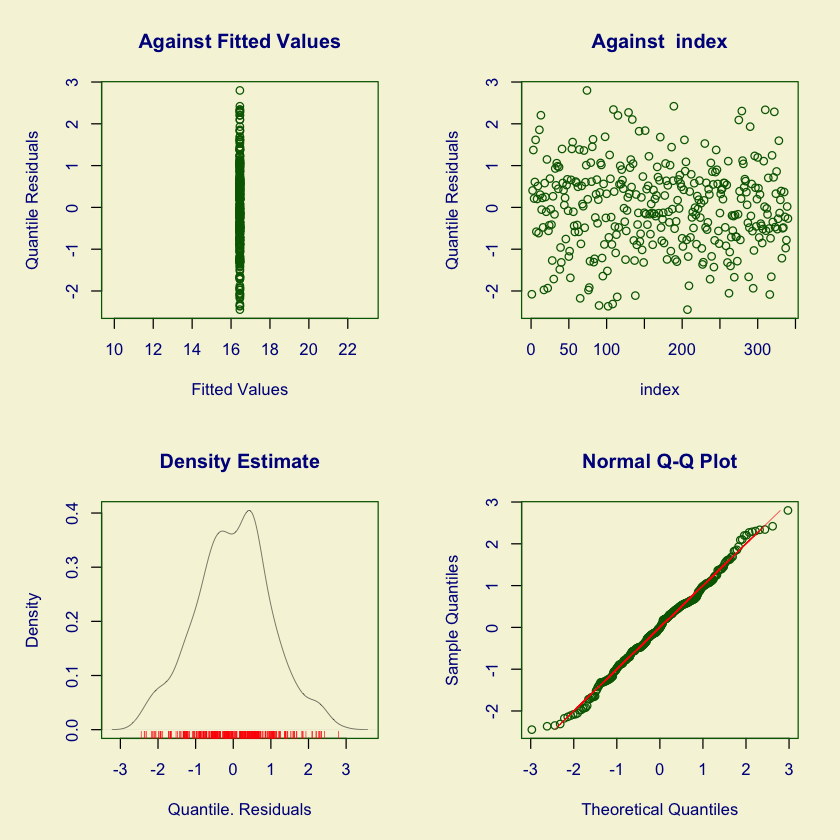

In [145]:
m1 <- fitDist(bmi, data=da, k=2)
m1$fit[1:6]
m1 <- histDist(da$bmi, "BCCG", density=TRUE, line.col=c(1,1), line.ty=c(1,2))
plot(m1)

In [140]:
# Fit different distributions
#gamlss(density(bmi, cut = 0) ~ bmi, family=JSU, data=da, method=mixed(1,20))
fit_jsu <- gamlss(bmi10 ~ 1,  family=JSU)
fit_bccg <- gamlss(bmi10 ~ 1, family=BCCG)
fit_tf <- gamlss(bmi10 ~ 1, family=TF)
fit_lognorm <- gamlss(bmi10 ~ 1, family=LOGNO)
fit_lo <- gamlss(bmi10 ~ 1, family=LO)
fit_pe <- gamlss(bmi10 ~ 1, family=PE)
fit_gamma <- gamlss(bmi10 ~ 1, family=GA)
fit_norm <- gamlss(bmi10 ~ 1, family=NO)
fit_wei <- gamlss(bmi10 ~ 1, family=WEI)
fit_gu <- gamlss(bmi10 ~ 1, family=GU)
fit_exp <- gamlss(bmi10 ~ 1, family=EXP)
fit_lg <- gamlss(bmi10 ~ 1, family=LG)

GAMLSS-RS iteration 1: Global Deviance = 1437.847 
GAMLSS-RS iteration 2: Global Deviance = 1408.338 
GAMLSS-RS iteration 3: Global Deviance = 1397.748 
GAMLSS-RS iteration 4: Global Deviance = 1393.98 
GAMLSS-RS iteration 5: Global Deviance = 1391.895 
GAMLSS-RS iteration 6: Global Deviance = 1390.445 
GAMLSS-RS iteration 7: Global Deviance = 1389.406 
GAMLSS-RS iteration 8: Global Deviance = 1388.686 
GAMLSS-RS iteration 9: Global Deviance = 1388.133 
GAMLSS-RS iteration 10: Global Deviance = 1387.706 
GAMLSS-RS iteration 11: Global Deviance = 1387.321 
GAMLSS-RS iteration 12: Global Deviance = 1387.017 
GAMLSS-RS iteration 13: Global Deviance = 1386.771 
GAMLSS-RS iteration 14: Global Deviance = 1386.569 
GAMLSS-RS iteration 15: Global Deviance = 1386.403 
GAMLSS-RS iteration 16: Global Deviance = 1386.263 
GAMLSS-RS iteration 17: Global Deviance = 1386.146 
GAMLSS-RS iteration 18: Global Deviance = 1386.046 
GAMLSS-RS iteration 19: Global Deviance = 1385.961 
GAMLSS-RS iteration 20

Warning message in RS():
“Algorithm RS has not yet converged”


GAMLSS-RS iteration 1: Global Deviance = 1399.911 
GAMLSS-RS iteration 2: Global Deviance = 1386.495 
GAMLSS-RS iteration 3: Global Deviance = 1384.593 
GAMLSS-RS iteration 4: Global Deviance = 1384.462 
GAMLSS-RS iteration 5: Global Deviance = 1384.451 
GAMLSS-RS iteration 6: Global Deviance = 1384.45 
GAMLSS-RS iteration 1: Global Deviance = 1436.441 
GAMLSS-RS iteration 2: Global Deviance = 1429.596 
GAMLSS-RS iteration 3: Global Deviance = 1428.3 
GAMLSS-RS iteration 4: Global Deviance = 1428.077 
GAMLSS-RS iteration 5: Global Deviance = 1428.04 
GAMLSS-RS iteration 6: Global Deviance = 1428.034 
GAMLSS-RS iteration 7: Global Deviance = 1428.033 
GAMLSS-RS iteration 8: Global Deviance = 1428.033 
GAMLSS-RS iteration 1: Global Deviance = 1433.15 
GAMLSS-RS iteration 2: Global Deviance = 1433.15 
GAMLSS-RS iteration 1: Global Deviance = 1441.477 
GAMLSS-RS iteration 2: Global Deviance = 1440.682 
GAMLSS-RS iteration 3: Global Deviance = 1440.681 
GAMLSS-RS iteration 1: Global Devianc

Warning message in RS():
“Algorithm RS has not yet converged”
Warning message in qnorm(uval):
“NaNs produced”


In [141]:
models <- list(fit_jsu, fit_tf, fit_lognorm, fit_lo, fit_pe, fit_gamma, fit_norm, fit_wei, fit_gu, fit_exp, fit_lg, fit_bccg)

# Compare models
aic_values <- sapply(models, AIC)
print(aic_values)

# Select the model with the lowest AIC
selected_model <- models[[which.min(aic_values)]]

 [1]  1393.924  1434.033  1437.150  1444.682  1450.553  1452.240  1488.827
 [8]  1603.679  1710.842  2602.461 55613.958  1390.450


The choice of distribution can be justified by comparing the Akaike Information Criterion (AIC) values of the fitted models—the model with the lowest AIC is typically preferred as it suggests a good fit with relatively lower complexity.

### 3. Output Parameter Estimates and Interpretation

Finally, for the chosen model, we can output the parameter estimates and interpret them according to the distribution's characteristics.

In [142]:
# Output parameter estimates for the chosen model
summary(selected_model)

******************************************************************
Family:  c("BCCG", "Box-Cox-Cole-Green") 

Call:  gamlss(formula = bmi10 ~ 1, family = BCCG) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.4545     0.1025   160.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Sigma link function:  log
Sigma Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.23992    0.04271  -52.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Nu link function:  identity 
Nu Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.5294     0.4087  -6.188 1.76e-09 ***
---
Signif. codes:  0 ‘

Interpretation of the parameters will depend on the selected distribution. For example:
- For a Normal distribution (`NO`), the parameters are the mean (`mu`) and standard deviation (`sigma`), representing the location and scale of the distribution.
- For a Log-Normal distribution (`LOGNO`), `mu` and `sigma` represent the mean and standard deviation of the variable's logarithm, indicating the distribution's central tendency and spread on a log scale.
- For a Gamma distribution (`GA`), the parameters might include a shape and a scale parameter, reflecting the distribution's skewness and scale.

Refer to the GAMLSS book or documentation for specific interpretations of the parameters of your chosen distribution. The interpretation will help in understanding the characteristics of BMI distribution among Dutch boys aged 10 to 11, such as its central tendency, variability, and potential skewness.

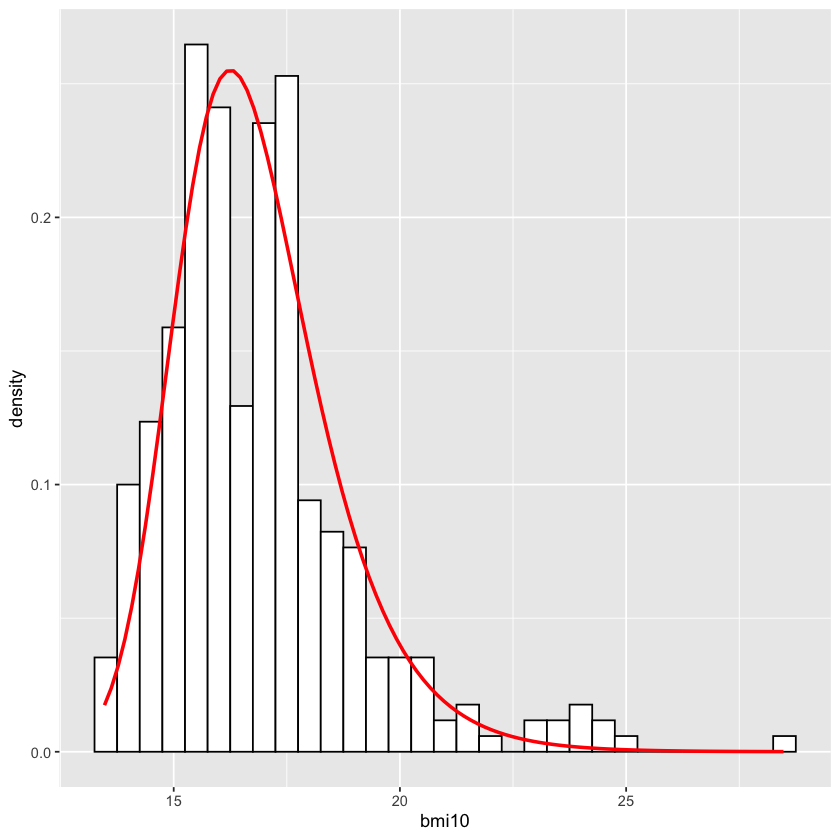

In [119]:
#  stat_function(fun = function(x) dJSU(x, mu=16.8475, sigma=0.7560, nu=2.439, tau=0.6890) / 12,color = "red", size = 1)
ggplot(da, aes(x=bmi10)) +
  geom_histogram(aes(y=..density..), binwidth = 0.5, colour="black", fill="white") +
  stat_function(fun = function(x) dJSU(x, mu=16.8475, sigma=1.7560, nu=2.439, tau=2.742),color = "red", size = 1)

$<NA>
NULL



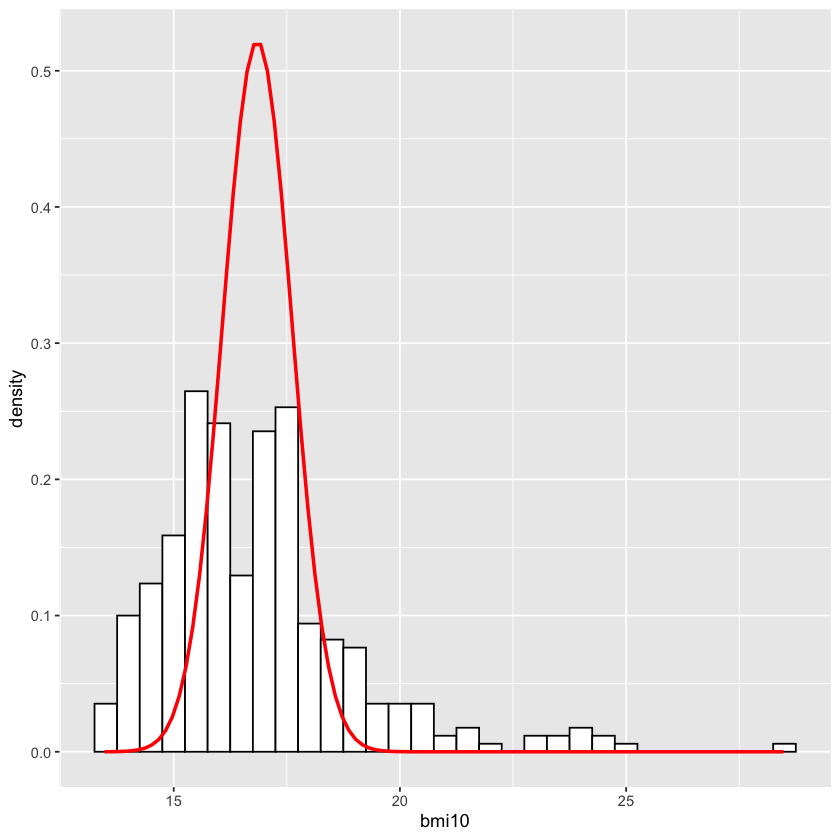

In [80]:
# Histogram with ggplot
print((fit_jsu)["mu"], sigma=coef(fit_jsu)["sigma"], nu=coef(fit_jsu)["nu"], tau=coef(fit_jsu)["tau"])
p <- ggplot(da, aes(x=bmi10)) +
  geom_histogram(aes(y=after_stat(density)), binwidth = 0.5, colour="black", fill="white") 

# Function to calculate the fitted density
density_fitted <- function(x) {
  dNO(x, mu=16.8476, sigma=0.76463) /
}

# Add the fitted model curve
p <- p + stat_function(fun=density_fitted, colour="red", size=1)

# Display the plot
print(p)

Warning message in wp(fit_lognorm):
“Some points are missed out 
increase the y limits using ylim.all”


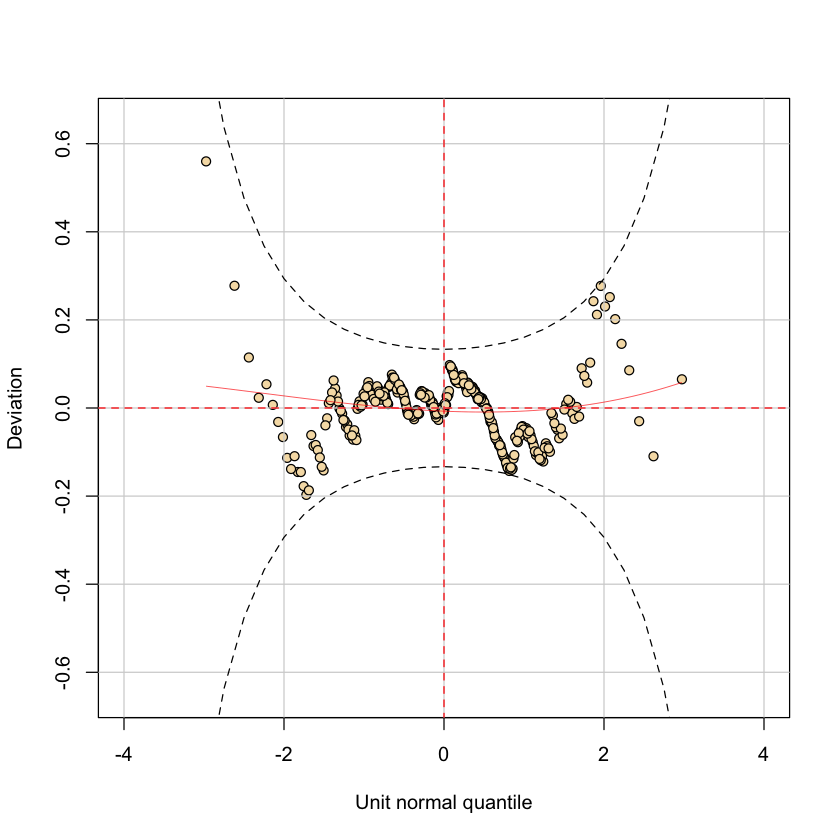

Warning message in wp(fit_tf):
“Some points are missed out 
increase the y limits using ylim.all”


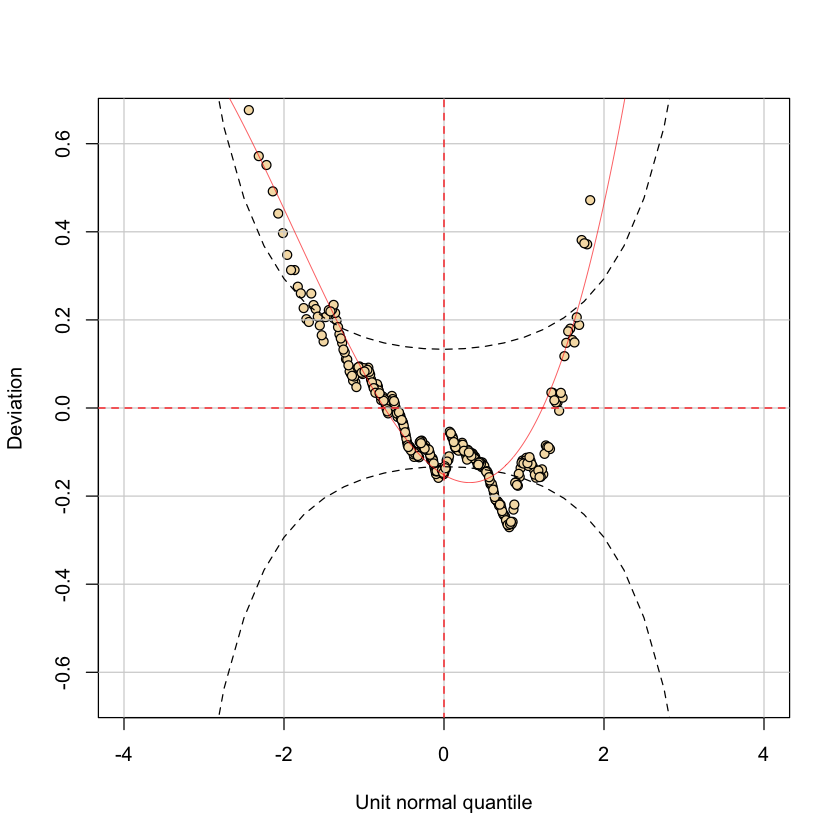

Warning message in wp(fit_lo):
“Some points are missed out 
increase the y limits using ylim.all”


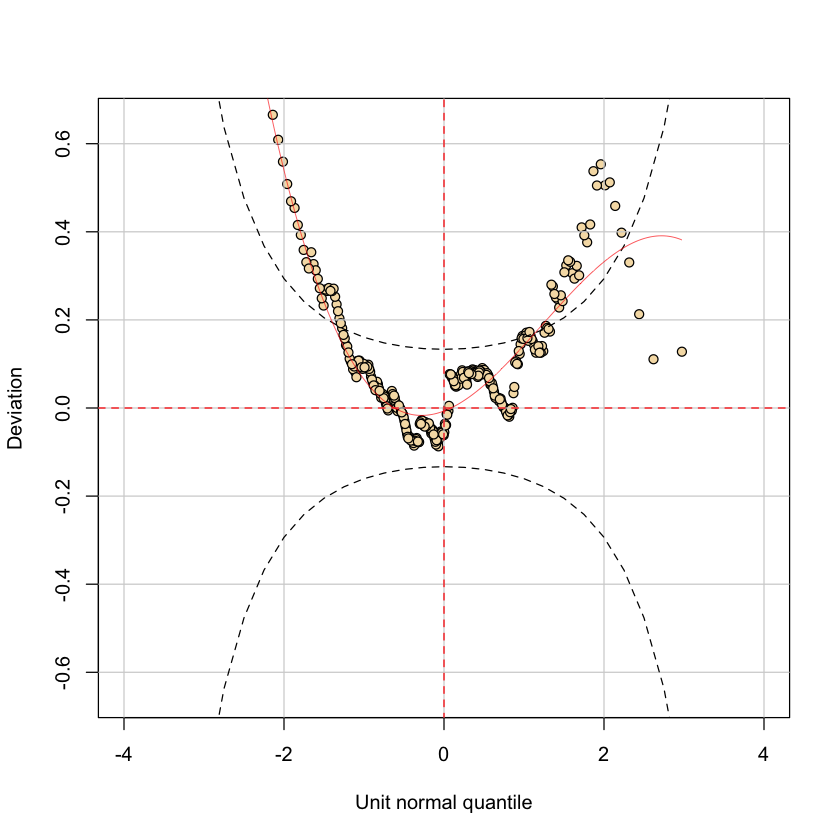

Warning message in wp(fit_pe):
“Some points are missed out 
increase the y limits using ylim.all”


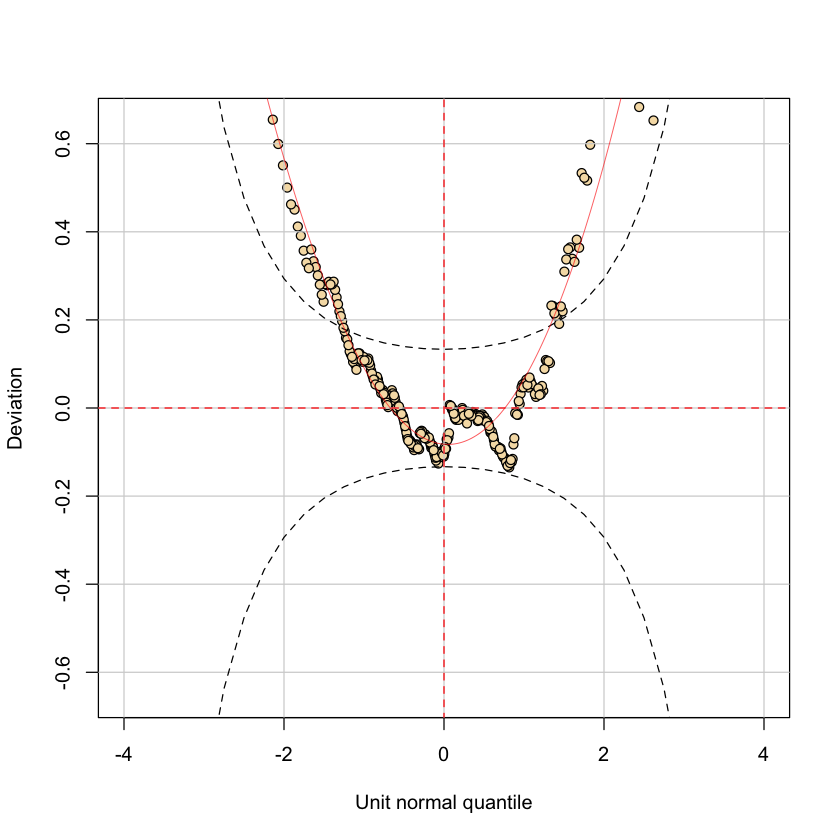

Warning message in wp(fit_gamma):
“Some points are missed out 
increase the y limits using ylim.all”


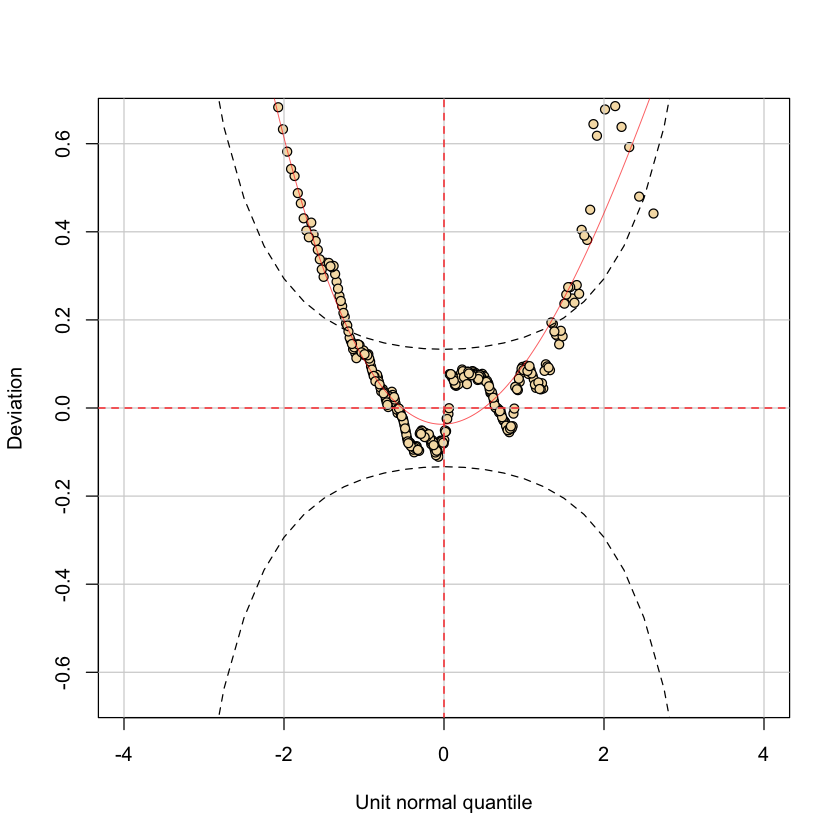

Warning message in wp(fit_norm):
“Some points are missed out 
increase the y limits using ylim.all”


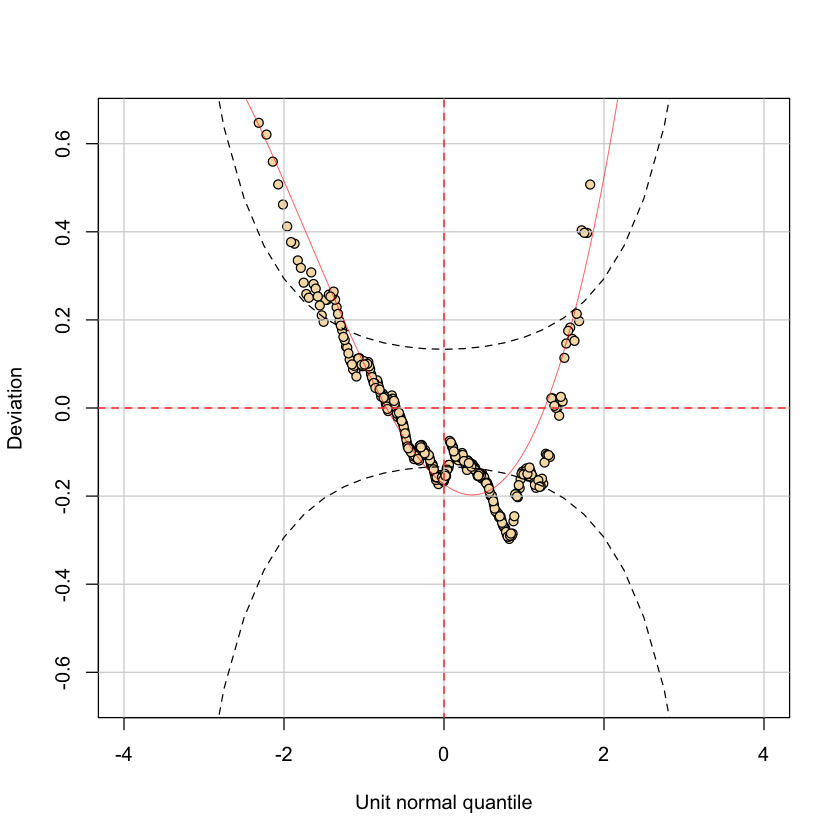

Warning message in wp(fit_wei):
“Some points are missed out 
increase the y limits using ylim.all”


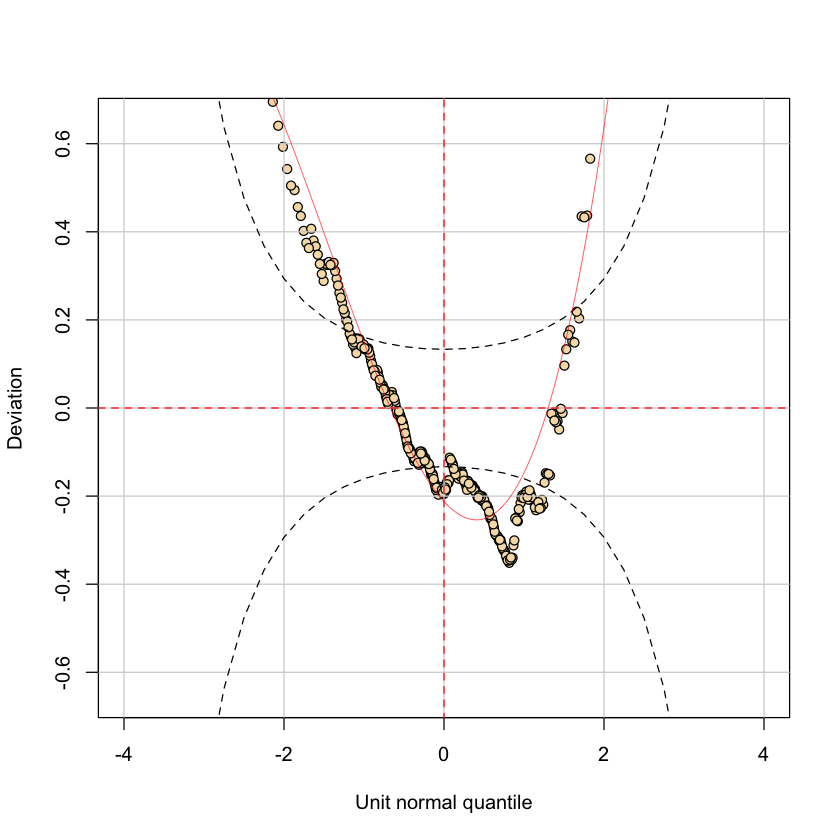

Warning message in wp(fit_gu):
“Some points are missed out 
increase the y limits using ylim.all”


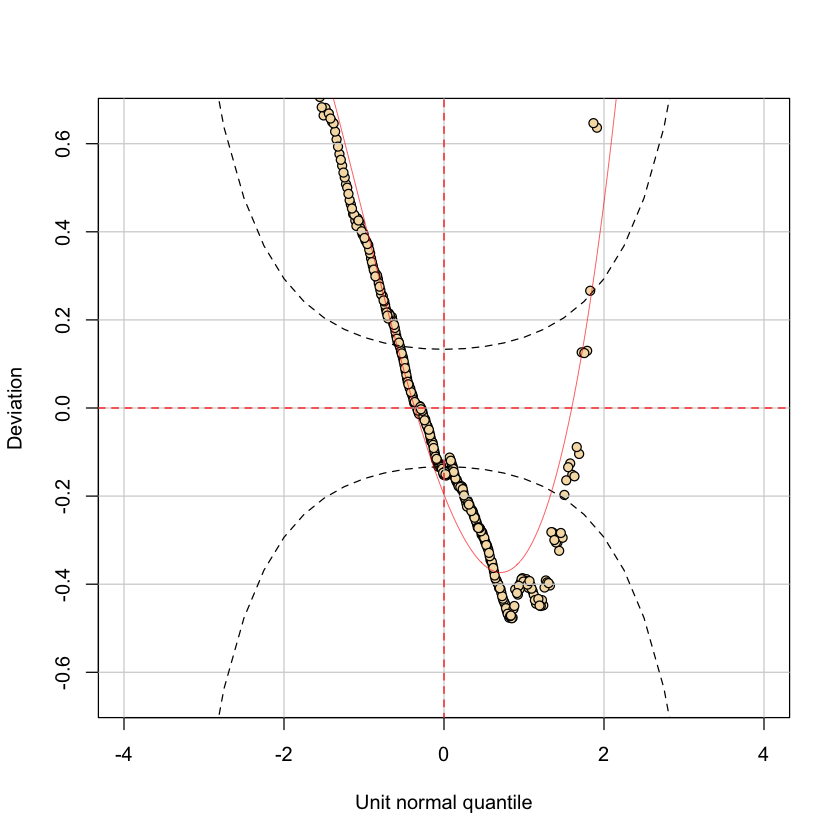

Warning message in wp(fit_exp):
“Some points are missed out 
increase the y limits using ylim.all”


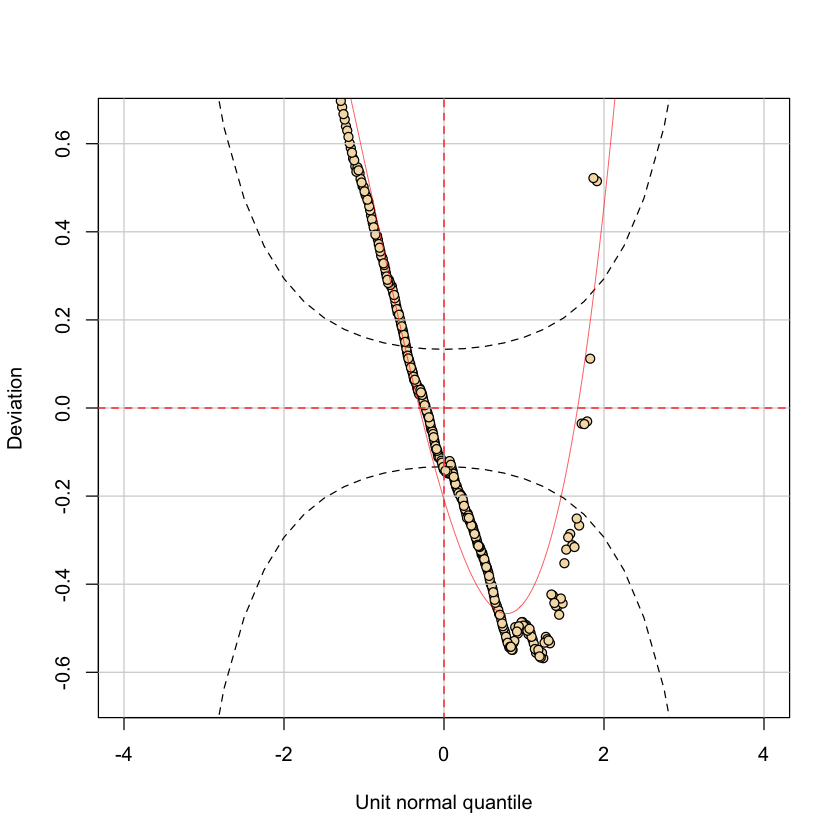

Warning message in wp(fit_lg):
“Some points are missed out 
increase the y limits using ylim.all”


ERROR: Error in if (any(abs(qq$x) > xlim.all)) {: missing value where TRUE/FALSE needed


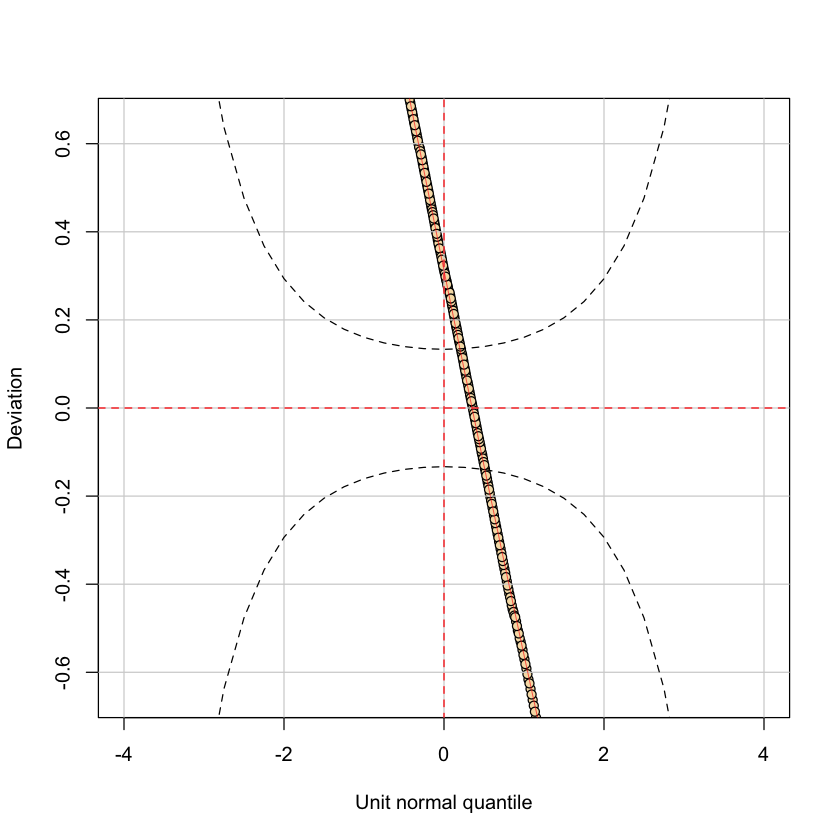

In [49]:

wp(fit_jsu)

wp(fit_lognorm)

wp(fit_tf)

wp(fit_lo)

wp(fit_pe)

wp(fit_gamma)

wp(fit_norm)

wp(fit_wei)

wp(fit_gu)

wp(fit_exp)

wp(fit_lg)


******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  -0.0003060339 
                       variance   =  0.9957524 
               coef. of skewness  =  0.03706349 
               coef. of kurtosis  =  3.015277 
Filliben correlation coefficient  =  0.9970543 
******************************************************************


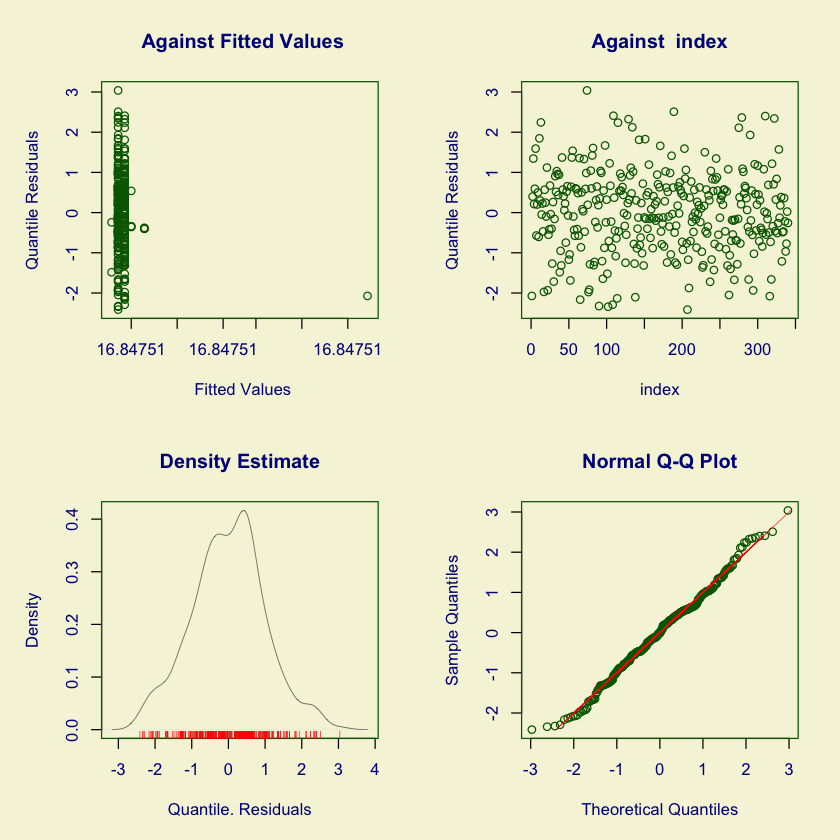

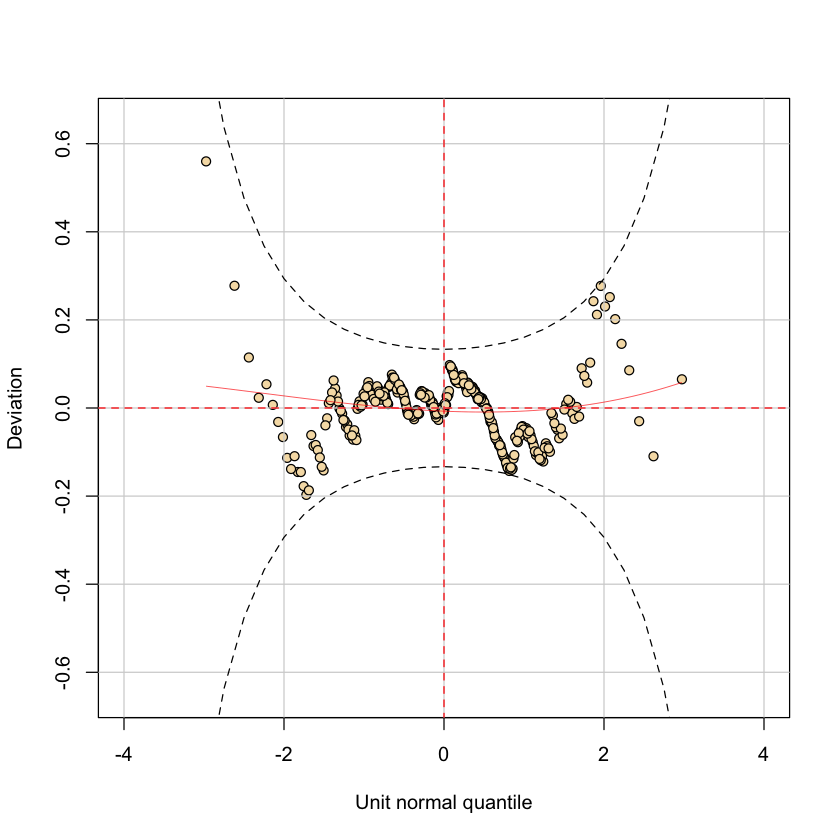

In [53]:
plot(fit_jsu)

wp(fit_jsu)


Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


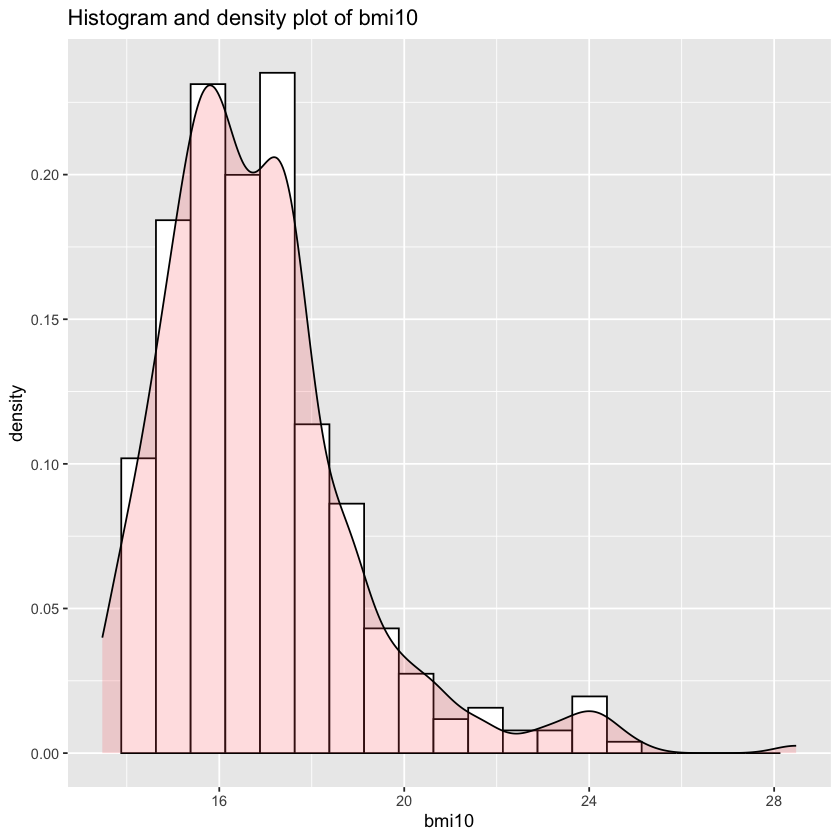

In [62]:
#pp<-ggplot(data=da, aes(x=age, y=bmi))+geom_point()
pp+geom_line(aes(y=fitted(fit_jsu)), col="blue")